<span style='font-size:20px;'>**Objectives:** Identify the growths and transformations of top ranked tech companies within a span of four years[2020-2023]</span>

<span style='font-size:20px;'>**Techniques:** Web Scraping for Data collection, Data Visualization and Data Analysis</span>

<span style='font-size:20px;'>**Sources**: Wikipedia</span>

<span style='font-size:20px;'>**2020 Rank List:**</span>

<span style='font-size:20px;'>**Step 1:** Import Libraries</span>

In [116]:
from bs4 import BeautifulSoup
import requests


<span style='font-size:20px;'>**Step 2:** Get Url Address </span>


In [101]:
#Specift the url address

url='https://en.wikipedia.org/wiki/List_of_largest_technology_companies_by_revenue'

#Request Data From Http 
page=requests.get(url) 

#Convert the requested data to text in html format
soup=BeautifulSoup(page.text,'html')



<span style='font-size:20px;'>**Step 3:** Locate the specific table containing the desired list </span>

In [104]:
#find specific table where the list is stsored

table=soup.find_all('table')[2]



 <span style='font-size:20px;'>**Step 4A:** Extract the table column headers</span>

In [105]:
table_columns=table.find_all('th')

#print(table_columns)




<span style='font-size:20px;'>**Step 4B :** Extract and clean the table column headers</span>

In [106]:
table_list=[col.text.strip() for col in table_columns]

#print(table_list)


<span style='font-size:20px;'>**Step 5:** Find all rows within the table </span>

In [107]:
find_row=table.find_all('tr')

<span style='font-size:20px;'>**Step 6A:** Extract and clean the data from the table rows, and create a DataFrame</span>

In [108]:
import pandas as pd

# Define an empty list to store row data
data_rows = []

# Initialize a variable to hold the number of columns
num_columns = 0

# Assuming the second column contains country logos
for row in find_row:
    row_data = row.find_all('td')

    # Skip the second column (index 1) if it contains logos
    individual_row_data = [data.text.strip() for idx, data in enumerate(row_data) if idx != 1]

    if num_columns == 0:
        num_columns = len(individual_row_data)

    # Ensure that individual_row_data has the same number of columns
    individual_row_data = individual_row_data[:num_columns]

    # Append the data to the list
    data_rows.append(individual_row_data)
custom_column_names = ["Rank", "Company", "Revenue[USD $Billions]", "Employee", "Revenue per Employee", "Headquarters"] 


# Convert the list of data to a DataFrame with custom column names
df = pd.DataFrame(data_rows, columns=custom_column_names)

# Reset the index of the final DataFrame
df.reset_index(drop=True, inplace=True)

<span style='font-size:20px;'>**Step 6B:** Display The DataFrame </span>

In [110]:
df


,Rank,Company,Revenue[USD $Billions],Employee,Revenue per Employee,Headquarters
0,None,None,None,None,None,None
1,1,Apple,$260.174,"137,000",1899.08029,"Cupertino, California, US"
2,2,Samsung Electronics,$197.705,"287,439",687.8155,"Suwon, South Korea"
3,3,Foxconn,$178.869,"757,404",236.16062,"New Taipei City, Taiwan"
4,4,Alphabet,$161.857,"118,899",1361.29824,"Mountain View, California, US"
5,5,Microsoft,$125.843,"144,000",873.90972,"Redmond, Washington, US"
6,6,Huawei,$124.316,"194,000",640.80412,"Shenzhen, China"
7,7,Dell Technologies,$92.154,"165,000",558.50909,"Round Rock, Texas, US"
8,8,Hitachi,$80.639,"301,056",267.85382,"Tokyo, Japan"
9,9,IBM,$77.147,"383,056",201.39875,"Armonk, New York, US"


<span style='font-size:20px;'>**Step 6C:** Remove the first row from the DataFrame</span>


In [87]:
df.drop(0, axis=0, inplace=True)

<span style='font-size:20px;'>**Step 6D:** Display The Dataframe</span>

In [111]:
df

,Rank,Company,Revenue[USD $Billions],Employee,Revenue per Employee,Headquarters
0,None,None,None,None,None,None
1,1,Apple,$260.174,"137,000",1899.08029,"Cupertino, California, US"
2,2,Samsung Electronics,$197.705,"287,439",687.8155,"Suwon, South Korea"
3,3,Foxconn,$178.869,"757,404",236.16062,"New Taipei City, Taiwan"
4,4,Alphabet,$161.857,"118,899",1361.29824,"Mountain View, California, US"
5,5,Microsoft,$125.843,"144,000",873.90972,"Redmond, Washington, US"
6,6,Huawei,$124.316,"194,000",640.80412,"Shenzhen, China"
7,7,Dell Technologies,$92.154,"165,000",558.50909,"Round Rock, Texas, US"
8,8,Hitachi,$80.639,"301,056",267.85382,"Tokyo, Japan"
9,9,IBM,$77.147,"383,056",201.39875,"Armonk, New York, US"


<span style='font-size:20px;'>**Step 7:** Save The DataFrame To a CSV_file </span>

In [112]:
df.to_csv("2020_Ranking_Tech.csv", index=False)





<span style='font-size:20px;'>**Step 8:** Data Visualization</span>

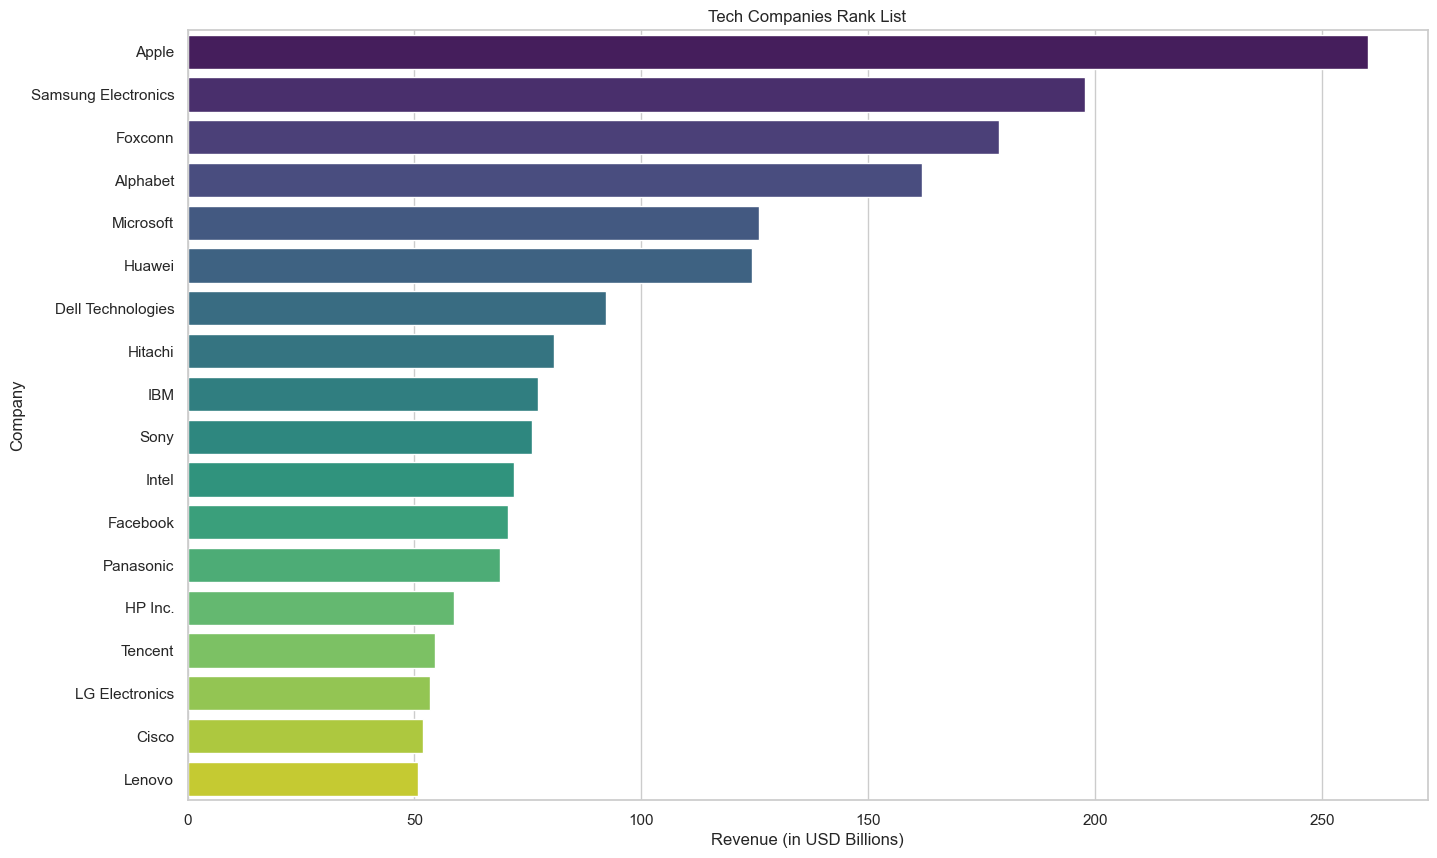

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove non-numeric characters from the 'Revenue[USD $Billions]' column
df['Revenue[USD $Billions]'] = df['Revenue[USD $Billions]'].str.replace('[\$,]', '', regex=True).astype(float)

# Set the style of the plot
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(16, 10))

# Create a horizontal bar plot
sns.barplot(x='Revenue[USD $Billions]', y='Company', data=df, palette="viridis")

# Customize labels and title
plt.xlabel('Revenue (in USD Billions)')
plt.ylabel('Company')
plt.title('Tech Companies Rank List')

# Show the horizontal bar chart
plt.show()

